In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# Chargement des données depuis un DataFrame 
url = "https://opendata.reseaux-energies.fr/explore/dataset/temperature-quotidienne-regionale/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=false"
data = pd.read_csv(url, sep=';')


In [4]:
data

id        date  code_insee_region  \
0      2018-01-01T00:00:00-11  2018-01-01                 11   
1      2018-01-01T00:00:00-28  2018-01-01                 28   
2      2018-01-01T00:00:00-24  2018-01-01                 24   
3      2018-01-02T00:00:00-11  2018-01-02                 11   
4      2018-01-02T00:00:00-84  2018-01-02                 84   
...                       ...         ...                ...   
37097  2023-10-28T00:00:00-94  2023-10-28                 94   
37098  2023-10-29T00:00:00-84  2023-10-29                 84   
37099  2023-10-30T00:00:00-94  2023-10-30                 94   
37100  2023-10-30T00:00:00-53  2023-10-30                 53   
37101  2023-10-30T00:00:00-93  2023-10-30                 93   

                           region   tmin   tmax   tmoy  
0                   Île-de-France   5.96   9.28   7.62  
1                       Normandie   5.00   8.98   6.99  
2             Centre-Val de Loire   5.25   9.68   7.47  
3                   Île-de-France   5.32  13.60   9.46  
4            Auvergne-Rhône-Alpes   3.02  11.56   7.29  
...                           ...    ...    ...    ...  
37097                       Corse  13.65  24.95  19.30  
37098        Auvergne-Rhône-Alpes  12.12  19.46  15.79  
37099                       Corse  16.20  27.05  21.62  
37100                    Bretagne   9.20  15.12  12.16  
37101  Provence-Alpes-Côte d'Azur  13.38  18.60  15.99  

[37102 rows x 7 columns]

In [113]:
data['date']

0        2020-08-13
1        2020-08-13
2        2020-08-14
3        2020-08-14
4        2020-08-14
            ...    
37097    2023-10-28
37098    2023-10-29
37099    2023-10-30
37100    2023-10-30
37101    2023-10-30
Name: date, Length: 37102, dtype: object

In [114]:
# Sélectionnez les colonnes pertinentes
data = data[['date', 'region', 'tmoy']]

# Conversion de la colonne 'date' en type datetime
data['date'] = pd.to_datetime(data['date'])
data_encoded = pd.get_dummies(data, columns=["region"])


C:\Users\leonm\AppData\Local\Temp\ipykernel_56928\1968774400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [115]:
data_encoded

date   tmoy  region_Auvergne-Rhône-Alpes  \
0     2020-08-13  22.30                            0   
1     2020-08-13  22.03                            0   
2     2020-08-14  21.70                            0   
3     2020-08-14  21.16                            0   
4     2020-08-14  20.27                            0   
...          ...    ...                          ...   
37097 2023-10-28  19.30                            0   
37098 2023-10-29  15.79                            1   
37099 2023-10-30  21.62                            0   
37100 2023-10-30  12.16                            0   
37101 2023-10-30  15.99                            0   

       region_Bourgogne-Franche-Comté  region_Bretagne  \
0                                   0                0   
1                                   0                0   
2                                   0                0   
3                                   0                0   
4                                   0                0   
...                               ...              ...   
37097                               0                0   
37098                               0                0   
37099                               0                0   
37100                               0                1   
37101                               0                0   

       region_Centre-Val de Loire  region_Corse  region_Grand Est  \
0                               0             0                 0   
1                               0             0                 0   
2                               0             0                 0   
3                               0             0                 0   
4                               0             0                 0   
...                           ...           ...               ...   
37097                           0             1                 0   
37098                           0             0                 0   
37099                           0             1                 0   
37100                           0             0                 0   
37101                           0             0                 0   

       region_Hauts-de-France  region_Normandie  region_Nouvelle-Aquitaine  \
0                           0                 0                          0   
1                           0                 0                          0   
2                           0                 0                          0   
3                           1                 0                          0   
4                           0                 1                          0   
...                       ...               ...                        ...   
37097                       0                 0                          0   
37098                       0                 0                          0   
37099                       0                 0                          0   
37100                       0                 0                          0   
37101                       0                 0                          0   

       region_Occitanie  region_Pays de la Loire  \
0                     0                        1   
1                     1                        0   
2                     0                        1   
3                     0                        0   
4                     0                        0   
...                 ...                      ...   
37097                 0                        0   
37098                 0                        0   
37099                 0                        0   
37100                 0                        0   
37101                 0                        0   

       region_Provence-Alpes-Côte d'Azur  region_Île-de-France  
0                                      0                     0  
1                                      0                     0  
2                                      0                

In [ ]:
 #Prédisez les températures pour une période à venir
# Vous pouvez spécifier une date future
future_date = pd.to_datetime('2023-11-01')
future_data = pd.DataFrame({'mois': [future_date.month], 'jour': [future_date.day], 'annee': [future_date.year]})

In [117]:

# Algorithme de Thompson Sampling
def thompson_sampling(data, nb_jours):
    decisions = []
    for tour in range(nb_jours):
        # Extraction des données pour le jour en cours
        jour_en_cours = data.iloc[tour]

        # Simulation des prévisions météorologiques pour le jour en cours
        prevision_tmin = np.random.uniform(15, 25)  
        prevision_tmax = np.random.uniform(20, 30) 

        # Dans cet exemple, nous supposerons que si la température minimale est élevée et la température maximale est élevée, le temps est ensoleillé.
        if prevision_tmin > 20 and prevision_tmax > 25:
            decision = "Ensoleillé"
        else:
            decision = "Pluvieux"  # Choisissez d'autres actions en fonction de vos critères

        # Ajouter la décision à la liste des décisions
        decisions.append({"date": jour_en_cours['date'], "decision": decision})

    return decisions

In [ ]:
# Nombre de jours (tours) pour lesquels vous souhaitez prendre des décisions
nb_jours = len(data)

# Exécutez l'algorithme de Thompson Sampling
resultats = thompson_sampling(data, nb_jours)

# Affichez les décisions prises pour chaque jour
for jour, decision in enumerate(resultats):
    print(f"Jour {jour + 1} ({decision['date']}): Prédiction météo = {decision['decision']}")


Jour 1 (2018-01-01 00:00:00): Prédiction météo = Ensoleillé
Jour 2 (2018-01-01 00:00:00): Prédiction météo = Pluvieux
Jour 3 (2018-01-01 00:00:00): Prédiction météo = Pluvieux
Jour 4 (2018-01-02 00:00:00): Prédiction météo = Pluvieux
Jour 5 (2018-01-02 00:00:00): Prédiction météo = Pluvieux
Jour 6 (2018-01-02 00:00:00): Prédiction météo = Pluvieux
Jour 7 (2018-01-02 00:00:00): Prédiction météo = Pluvieux
Jour 8 (2018-01-04 00:00:00): Prédiction météo = Pluvieux
Jour 9 (2018-01-05 00:00:00): Prédiction météo = Pluvieux
Jour 10 (2018-01-07 00:00:00): Prédiction météo = Ensoleillé
Jour 11 (2018-01-08 00:00:00): Prédiction météo = Ensoleillé
Jour 12 (2018-01-09 00:00:00): Prédiction météo = Pluvieux
Jour 13 (2018-01-10 00:00:00): Prédiction météo = Pluvieux
Jour 14 (2018-01-10 00:00:00): Prédiction météo = Ensoleillé
Jour 15 (2018-01-11 00:00:00): Prédiction météo = Pluvieux
Jour 16 (2018-01-11 00:00:00): Prédiction météo = Pluvieux
Jour 17 (2018-01-12 00:00:00): Prédiction météo = Pluvieu

In [ ]:
class BetaAlgo():
  """
  The algos try to learn which Bandit arm is the best to maximize reward.
  
  It does this by modelling the distribution of the Bandit arms with a Beta, 
  assuming the true probability of success of an arm is Bernouilli distributed.
  """
  def __init__(self, data):
    """
    Args:
      bandit: the bandit class the algo is trying to model
    """
    self.bandit =data
    self.arm_count = len(data)
    self.alpha = np.ones(self.arm_count)
    self.beta = np.ones(self.arm_count)
  
  def get_reward_regret(self, arm):
    reward, regret = self.data.get_reward_regret(arm)
    self._update_params(arm, reward)
    return reward, regret
  
  def _update_params(self, arm, reward):
    self.alpha[arm] += reward
    self.beta[arm] += 1 - reward

class BernGreedy(BetaAlgo):
  def __init__(self, bandit):
    super().__init__(bandit)
  
  @staticmethod
  def name():
    return 'beta-greedy'

In [ ]:
def get_action(self):
    """ Bernouilli parameters are the expected values of the beta"""
    theta = self.alpha / (self.alpha + self.beta)
    return theta.argmax()
  
class BernThompson(BetaAlgo):
  def __init__(self, bandit):
    super().__init__(bandit)

  @staticmethod
  def name():
    return 'thompson'
  
  def get_action(self):
    """ Bernouilli parameters are sampled from the beta"""
    theta = np.random.beta(self.alpha, self.beta)
    return theta.argmax()


In [118]:
class UCB():
    

    def __init__(self, data):
        self.data = data
        self.total_actions = len(data)
        self.action_counts = np.zeros(self.total_actions)
        self.cumulative_reward = 0
        self.average_reward = np.zeros(self.total_actions)

    @staticmethod
    def name():
        return "UCB Algorithm"

    def get_action(self):
        exploration_factor = 2.0 
        exploration_bonus = exploration_factor * np.sqrt(np.log(self.total_actions + 1) / (self.action_counts + 1e-6))
        upper_confidence_bound = self.average_reward + exploration_bonus
        action = np.argmax(upper_confidence_bound)
        return action

    def get_reward_regret(self, action):
        tmoy = self.data.iloc[action]['tmoy']
        self.action_counts[action] += 1
        self.cumulative_reward += tmoy
        self.average_reward[action] = self.cumulative_reward / np.sum(self.action_counts)
        regret = self.get_max_possible_reward() - tmoy
        return tmoy, regret

    def get_max_possible_reward(self):
        return np.max(self.data['tmoy'])
    def name(self):
        return "UCB Algorithm"


In [119]:
# Exécutez l'algorithme pour un certain nombre d'itérations
ucb_test = UCB(data)
for _ in range(40000):
    action = ucb_test.get_action()
    reward, regret = ucb_test.get_reward_regret(action)
    print(f"Action: {action}, Récompense: {reward}, Regret: {regret}")

Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 1, Récompense: 22.03, Regret: 10.670000000000002
Action: 2, Récompense: 21.7, Regret: 11.000000000000004
Action: 3, Récompense: 21.16, Regret: 11.540000000000003
Action: 4, Récompense: 20.27, Regret: 12.430000000000003
Action: 5, Récompense: 21.08, Regret: 11.620000000000005
Action: 6, Récompense: 18.59, Regret: 14.110000000000003
Action: 7, Récompense: 22.74, Regret: 9.960000000000004
Action: 8, Récompense: 21.6, Regret: 11.100000000000001
Action: 9, Récompense: 20.94, Regret: 11.760000000000002
Action: 10, Récompense: 20.42, Regret: 12.280000000000001
Action: 11, Récompense: 22.21, Regret: 10.490000000000002
Action: 12, Récompense: 20.27, Regret: 12.430000000000003
Action: 13, Récompense: 21.96, Regret: 10.740000000000002
Action: 14, Récompense: 21.22, Regret: 11.480000000000004
Action: 15, Récompense: 21.38, Regret: 11.320000000000004
Action: 16, Récompense: 24.99, Regret: 7.710000000000004
Action: 17, Récompense: 25.87

In [121]:
epsilon = 0.5
class EpsilonGreedy():
  """
  Epsilon Greedy with incremental update.
  Based on Sutton and Barto pseudo-code, page. 24
  """
  def __init__(self, data):
    global epsilon
    self.epsilon = epsilon
    self.data = data
    self.arm_count = len(data)
    self.Q = np.zeros(self.arm_count) # q-value of actions
    self.N = np.zeros(self.arm_count) # action count
  
  @staticmethod
  def name():
    return 'epsilon-greedy'
  
  def get_action(self):
    if np.random.uniform(0,1) > self.epsilon:
      action = self.Q.argmax()
    else:
      action = np.random.randint(0, self.arm_count)
    return action
  
  def get_reward_regret(self, arm):
    tmoy = self.data.loc[arm, 'tmoy']
    reward = tmoy
    regret = self.get_max_possible_reward() - tmoy
    self._update_params(arm, reward)
    return reward, regret
  def get_max_possible_reward(self):
        
        return self.data['tmoy'].max()

  
  def _update_params(self, arm, reward):
    self.N[arm] += 1 # increment action count
    self.Q[arm] += 1/self.N[arm] * (- self.Q[arm]) # inc. update rule
 

In [122]:
data['tmoy']

0        22.30
1        22.03
2        21.70
3        21.16
4        20.27
         ...  
37097    19.30
37098    15.79
37099    21.62
37100    12.16
37101    15.99
Name: tmoy, Length: 37102, dtype: float64

In [123]:
epsilon_greedy = EpsilonGreedy(data)

# Exécutez l'algorithme pour un certain nombre d'itérations
for _ in range(40000):
    action = epsilon_greedy.get_action()
    reward, regret = epsilon_greedy.get_reward_regret(action)
    print(f"Action: {action}, Récompense: {reward}, Regret: {regret}")

Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 24168, Récompense: 12.23, Regret: 20.470000000000002
Action: 21356, Récompense: 8.77, Regret: 23.930000000000003
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 18169, Récompense: 17.52, Regret: 15.180000000000003
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 330, Récompense: 11.18, Regret: 21.520000000000003
Action: 26731, Récompense: 14.4, Regret: 18.300000000000004
Action: 29493, Récompense: 18.23, Regret: 14.470000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 0, Récompense: 22.3, Regret: 10.400000000000002
Action: 26888, Récompe

In [124]:
df=data

In [125]:
def plot_data(y):
  """ y is a 1D vector """
  x = np.arange(y.size)
  _ = plt.plot(x, y, 'o')
  
def multi_plot_data(data, names):
  """ data, names are lists of vectors """
  x = np.arange(data[0].size)
  for i, y in enumerate(data):
    plt.plot(x, y, 'o', markersize=2, label=names[i])
  plt.legend(loc='upper right', prop={'size': 16}, numpoints=10)
  plt.show()
  
def simulate(simulations, timesteps, arm_count, Algorithm,df):
  """ Simulates the algorithm over 'simulations' epochs """
  sum_regrets = np.zeros(timesteps)
  for e in range(simulations):
        # Initialisez ou chargez vos données ici, au lieu de l'appeler comme une fonction
        data_instance = df
        algo = Algorithm(data_instance)
        regrets = np.zeros(timesteps)
        for i in range(timesteps):
            action = algo.get_action()
            reward, regret = algo.get_reward_regret(action)
            regrets[i] = regret
        sum_regrets += regrets  
  mean_regrets = sum_regrets / simulations
  return mean_regrets



In [126]:
def experiment(arm_count, timesteps=1000, simulations=1000):
  """ 
  Standard setup across all experiments 
  Args:
    timesteps: (int) how many steps for the algo to learn the bandit
    simulations: (int) number of epochs
  """
  algos=[EpsilonGreedy,UCB]
  algos_name=["EpsilonGreedy","UCB"]
  regrets = []
  names = []
  i=0
  for algo in algos:
        # Ajoutez le DataFrame comme argument dans l'appel de la fonction simulate
        regrets.append(simulate(simulations, timesteps, arm_count, algo, df))
        names.append(algos_name[i])
        i+=1
  multi_plot_data(regrets, names)
  i=0
  for algo in algos:
    regrets.append(simulate(simulations, timesteps, arm_count, algo))
    names.append(algos_name[i])
    i+=1
  multi_plot_data(regrets, names)

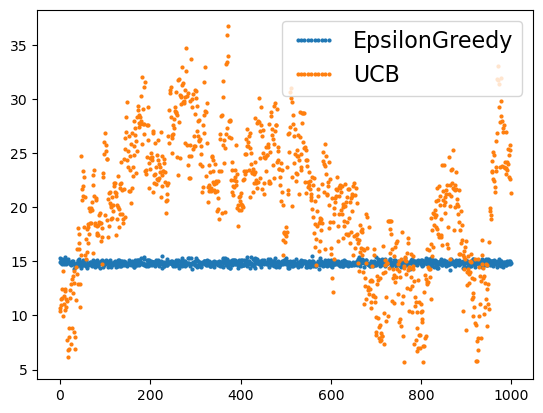

TypeError: simulate() missing 1 required positional argument: 'df'

In [127]:

# Experiment 1
arm_count = len(df) # number of arms in bandit
epsilon = 0.5
ucb_c = 2
stationary=True
experiment(arm_count)

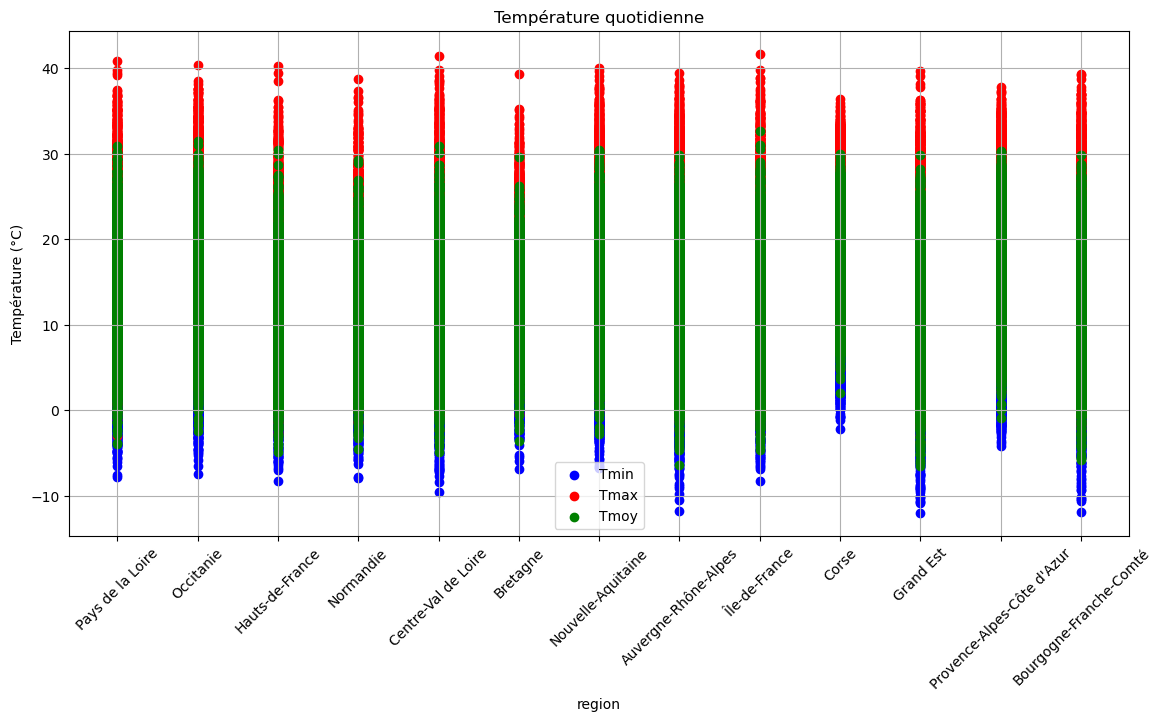

In [ ]:

temperature_data = data[['tmin', 'tmax', 'tmoy']]

plt.figure(figsize=(12, 6))
plt.scatter(data['region'], temperature_data['tmin'], label='Tmin', color='blue')
plt.scatter(data['region'], temperature_data['tmax'], label='Tmax', color='red')
plt.scatter(data['region'], temperature_data['tmoy'], label='Tmoy', color='green')

plt.xlabel('region')
plt.ylabel('Température (°C)')
plt.title('Température quotidienne')
plt.legend()


plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)  
plt.show()







In [ ]:
grouped_data = data.groupby('region')
region_dataframes = {}
for region, region_group in grouped_data:
    region_dataframes[region] = region_group


In [ ]:
for region, df in region_dataframes.items():
    print(f'Données pour la région {region}:')
    print(df)

Données pour la région Auvergne-Rhône-Alpes:
                           id        date  code_insee_region  \
11     2020-08-16T00:00:00-84  2020-08-16                 84   
13     2020-08-18T00:00:00-84  2020-08-18                 84   
41     2020-09-01T00:00:00-84  2020-09-01                 84   
62     2020-10-23T00:00:00-84  2020-10-23                 84   
89     2020-11-01T00:00:00-84  2020-11-01                 84   
...                       ...         ...                ...   
37016  2023-10-25T00:00:00-84  2023-10-25                 84   
37024  2023-10-28T00:00:00-84  2023-10-28                 84   
37040  2023-10-04T00:00:00-84  2023-10-04                 84   
37095  2023-10-27T00:00:00-84  2023-10-27                 84   
37101  2023-10-30T00:00:00-84  2023-10-30                 84   

                     region   tmin   tmax   tmoy  
11     Auvergne-Rhône-Alpes  17.17  27.25  22.21  
13     Auvergne-Rhône-Alpes  15.25  28.66  21.96  
41     Auvergne-Rhône-Alpes   8.4